In [2]:
import cv2
from ultralytics import YOLO

In [2]:
# Load the YOLO model
model = YOLO("../chess_model/runs/detect/chess_data_model_yolo11m_epoch50_combined_data/weights/best.pt")

# Open the video file
video_path = "./chess_data/kaggle_data/2_move_student.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        resized_frame = cv2.resize(annotated_frame, (0, 0), fx=0.5, fy=0.5)

        # Display the annotated frame
        cv2.imshow("YOLO Inference", resized_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 416x256 1 bishop, 5 black-bishops, 1 black-king, 3 black-knights, 3 black-pawns, 1 black-queen, 4 black-rooks, 1 white-bishop, 2 white-kings, 3 white-knights, 3 white-pawns, 1 white-queen, 50.5ms
Speed: 5.1ms preprocess, 50.5ms inference, 112.8ms postprocess per image at shape (1, 3, 416, 256)

0: 416x256 1 bishop, 5 black-bishops, 1 black-king, 3 black-knights, 3 black-pawns, 1 black-queen, 4 black-rooks, 1 white-bishop, 2 white-kings, 3 white-knights, 3 white-pawns, 1 white-queen, 9.6ms
Speed: 1.3ms preprocess, 9.6ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 256)

0: 416x256 1 bishop, 6 black-bishops, 1 black-king, 3 black-knights, 3 black-pawns, 1 black-queen, 4 black-rooks, 1 white-bishop, 2 white-kings, 3 white-knights, 3 white-pawns, 1 white-queen, 9.5ms
Speed: 0.5ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 256)

0: 416x256 1 bishop, 6 black-bishops, 1 black-king, 3 black-knights, 3 black-pawns, 1 black-queen, 4 black-roo

In [26]:
from ultralytics import YOLO
import cv2

# Load the YOLO model
model = YOLO("../chess_model/runs/detect/chess_data_model_yolo11m_epoch14_combined_data/weights/best.pt")

# Input video path
input_video_path = "./chess_data/kaggle_data/2_move_student.mp4"

# Output video path
output_video_path = "./runs/predict/output_video1.mp4"

# Open input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Run the model on the video with streaming
results = model(input_video_path, stream=True)

# Process and save each frame
for result in results:
    frame = result.plot()  # Get the processed frame with detections
    out.write(frame)  # Write the frame to the output video

# Release resources
cap.release()
out.release()
print(f"Video saved to {output_video_path}")



video 1/1 (frame 1/1578) c:\Users\Ting-yi\Desktop\Chess-Detection-Project\chess_model\chess_data\kaggle_data\2_move_student.mp4: 416x256 3 black-bishops, 1 black-king, 3 black-knights, 6 black-pawns, 1 black-queen, 3 black-rooks, 2 white-bishops, 2 white-knights, 6 white-pawns, 3 white-rooks, 60.1ms
video 1/1 (frame 2/1578) c:\Users\Ting-yi\Desktop\Chess-Detection-Project\chess_model\chess_data\kaggle_data\2_move_student.mp4: 416x256 3 black-bishops, 1 black-king, 3 black-knights, 5 black-pawns, 1 black-queen, 3 black-rooks, 2 white-bishops, 2 white-knights, 5 white-pawns, 3 white-rooks, 55.1ms
video 1/1 (frame 3/1578) c:\Users\Ting-yi\Desktop\Chess-Detection-Project\chess_model\chess_data\kaggle_data\2_move_student.mp4: 416x256 3 black-bishops, 1 black-king, 3 black-knights, 5 black-pawns, 1 black-queen, 3 black-rooks, 2 white-bishops, 2 white-knights, 5 white-pawns, 3 white-rooks, 29.7ms
video 1/1 (frame 4/1578) c:\Users\Ting-yi\Desktop\Chess-Detection-Project\chess_model\chess_data

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
classMap = ['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']

def buildImage(image, label):
    image = cv2.imread(os.path.join(image))
    labelFile = open(os.path.join(label))
    labels = labelFile.readlines()

    height, width, _ = image.shape

    for label in labels:
        _, xCen, yCen, iW, iH = [float(x) for x in label.split()]
        xCen, yCen, iW, iH = xCen * width, yCen * height, iW * width, iH * height
        start_point = (int(xCen - iW//2), int(yCen - iH//2))
        end_point   = (int(xCen + iW//2), int(yCen + iH//2))
        
        cv2.rectangle(image, start_point, end_point, (0,0,255), 2)

        #### put text

        text = classMap[int(label.split()[0])]
        position = list(start_point)  # Bottom-left corner of the text
        position[0] = position[0] - 10
        position[1] = position[1] - 10
        font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
        font_scale = 2  # Font size
        color = (0, 0, 255)  # Text color in BGR (Green in this case)
        thickness = 5  # Thickness of the text

        # Add text to the image
        cv2.putText(image, text, position, font, font_scale, color, thickness)

    return image

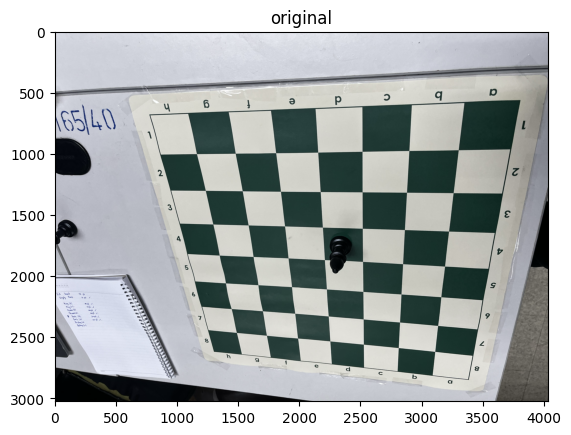

In [11]:
img = Image.open("./chess_data/train/images/BlackBishop_2303.png")
plt.imshow(img)
plt.title("original")
plt.show()


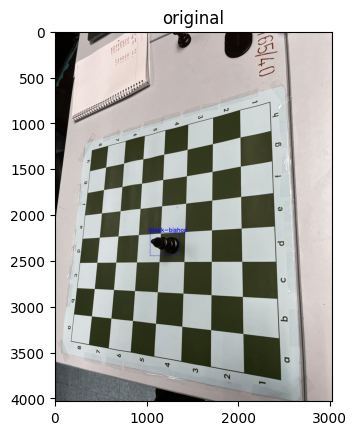

In [12]:
imgl = buildImage("./chess_data/train/images/BlackBishop_2303.png", "./chess_data/train/labels/BlackBishop_2303.txt")
plt.imshow(imgl)
plt.title("original")
plt.show()